In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dc-wikia-data.csv', sep=',')

In [4]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [5]:
df.shape

(6896, 13)

In [6]:
df.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [7]:
#поиск пропусков
for col in df.columns:
    is_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(is_missing*100)))

page_id - 0%
name - 0%
urlslug - 0%
ID - 29%
ALIGN - 9%
EYE - 53%
HAIR - 33%
SEX - 2%
GSM - 99%
ALIVE - 0%
APPEARANCES - 5%
FIRST APPEARANCE - 1%
YEAR - 1%


Целочисленными значениями будем кодировать признак name (пропусков нет). Маштабировать - признак Appearances (есть пропуски).

In [12]:
df['APPEARANCES'].unique()

array([3.093e+03, 2.496e+03, 1.565e+03, 1.316e+03, 1.237e+03, 1.231e+03,
       1.121e+03, 1.095e+03, 1.075e+03, 1.028e+03, 9.690e+02, 9.510e+02,
       9.340e+02, 9.300e+02, 8.030e+02, 7.160e+02, 7.060e+02, 6.770e+02,
       6.540e+02, 6.350e+02, 6.050e+02, 5.950e+02, 5.930e+02, 5.840e+02,
       5.600e+02, 5.580e+02, 5.570e+02, 5.490e+02, 5.170e+02, 4.920e+02,
       4.870e+02, 4.700e+02, 4.390e+02, 4.360e+02, 4.290e+02, 4.270e+02,
       4.230e+02, 4.220e+02, 4.130e+02, 3.990e+02, 3.930e+02, 3.910e+02,
       3.880e+02, 3.860e+02, 3.740e+02, 3.710e+02, 3.700e+02, 3.610e+02,
       3.560e+02, 3.530e+02, 3.500e+02, 3.450e+02, 3.440e+02, 3.360e+02,
       3.350e+02, 3.250e+02, 3.210e+02, 3.190e+02, 3.140e+02, 3.110e+02,
       3.090e+02, 3.080e+02, 3.060e+02, 3.050e+02, 3.010e+02, 3.000e+02,
       2.990e+02, 2.970e+02, 2.910e+02, 2.880e+02, 2.860e+02, 2.840e+02,
       2.820e+02, 2.680e+02, 2.660e+02, 2.620e+02, 2.610e+02, 2.560e+02,
       2.540e+02, 2.530e+02, 2.520e+02, 2.500e+02, 

In [22]:
#заполним пропуски медианой
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data1 = imp1.fit_transform(df[['APPEARANCES']])
pd.isnull(data1).sum()

0

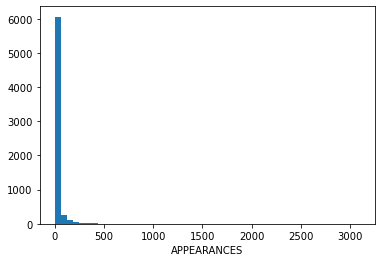

In [14]:
plt.hist(df['APPEARANCES'], 50)
plt.xlabel('APPEARANCES')
plt.show()

Пропусков в столбце APPEARANCES не осталось

## Масштабирование данных

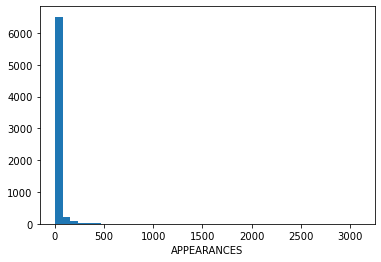

In [18]:
plt.hist(data1, 40)
plt.xlabel('APPEARANCES')
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data1)

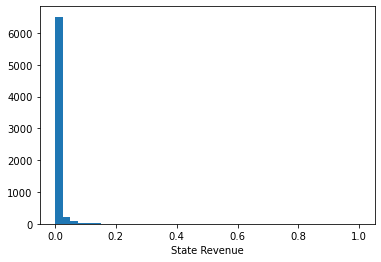

In [25]:
plt.hist(sc1_data, 40)
plt.xlabel('State Revenue')
plt.show()

## Преобразование категориальных признаков в количественные

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
df['name']

0               Batman (Bruce Wayne)
1              Superman (Clark Kent)
2         Green Lantern (Hal Jordan)
3           James Gordon (New Earth)
4        Richard Grayson (New Earth)
                    ...             
6891         Nadine West (New Earth)
6892      Warren Harding (New Earth)
6893    William Harrison (New Earth)
6894    William McKinley (New Earth)
6895              Mookie (New Earth)
Name: name, Length: 6896, dtype: object

In [30]:
df['name'].unique()

array(['Batman (Bruce Wayne)', 'Superman (Clark Kent)',
       'Green Lantern (Hal Jordan)', ..., 'William Harrison (New Earth)',
       'William McKinley (New Earth)', 'Mookie (New Earth)'], dtype=object)

In [31]:
#преобразование
le1 = LabelEncoder()
le1.fit_transform(df['name'])

array([ 597, 6007, 2487, ..., 6708, 6723, 4466])

In [32]:
list(le1.classes_)

['3g4 (New Earth)',
 '500-ZQ (New Earth)',
 "A'Hwiirdh-Paan'A (New Earth)",
 "A'monn A'mokk (New Earth)",
 "A'morr (New Earth)",
 'A-Mortal (New Earth)',
 'A.J. (New Earth)',
 'AR-N-O-Q (New Earth)',
 'AWOL (New Earth)',
 'Aa (New Earth)',
 'Aarden (New Earth)',
 'Aaron Babcock (New Earth)',
 'Aaron Cash (New Earth)',
 'Aaron Hayley (New Earth)',
 'Aaron Helzinger (New Earth)',
 'Aaron Jase (New Earth)',
 'Aaron Langstrom (New Earth)',
 'Abdul Smith (New Earth)',
 'Abe Crane (New Earth)',
 'Abednego Danner (New Earth)',
 'Abel (New Earth)',
 'Abel Tarrant (New Earth)',
 'Abigail Arcane (New Earth)',
 'Abigail Hunkel (New Earth)',
 'Abigail Moorland (New Earth)',
 'Abin Sur (New Earth)',
 'Able Crown (New Earth)',
 'Abnegazar (New Earth)',
 'Abner Girdler (New Earth)',
 'Abner Krill (New Earth)',
 'Abraham Arlington (New Earth)',
 'Abraham Lincoln (New Earth)',
 'Abraham Pointe (New Earth)',
 'Abraxis (New Earth)',
 'Abu-Gita (New Earth)',
 'Abyss (New Earth)',
 'Abyssma (New Earth)',
 

Закодировали признак name целочисленными значениями методом label encoding

In [36]:
enc1 = OneHotEncoder(handle_unknown='ignore')
state_enc = enc1.fit_transform(df[['name']])
state_enc.toarray()[0:7]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
enc1.categories_

[array(['3g4 (New Earth)', '500-ZQ (New Earth)',
        "A'Hwiirdh-Paan'A (New Earth)", ..., 'Zyklon (New Earth)',
        'Zyn (New Earth)', 'Zzlrrrzzzm (New Earth)'], dtype=object)]

Закодировали признак name целочисленными значениями методом one hot encoding. В данном случае предпочтительнее метод label encoding, так как в кодируемом столбце много уникальных значений, а значит большой размер матрицы при one hot encoding.

## Гистограмма

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YEAR', ylabel='Density'>

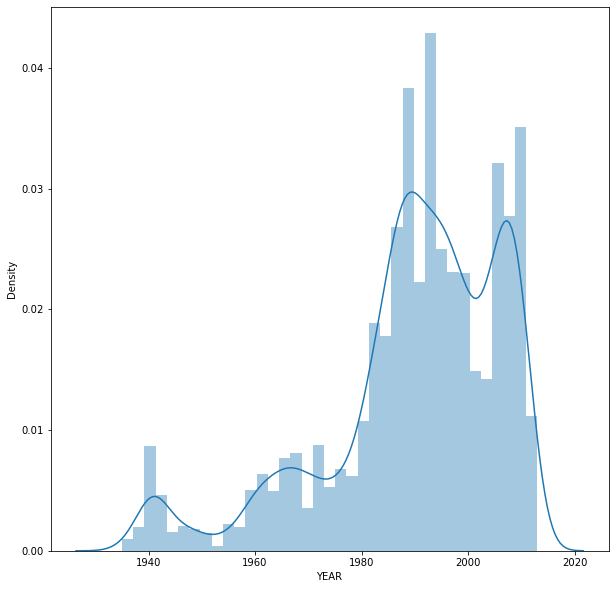

In [38]:
#гистограмма, позволяющаяоценить плотность вероятности распределения
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['YEAR'])

<AxesSubplot:xlabel='YEAR', ylabel='Count'>

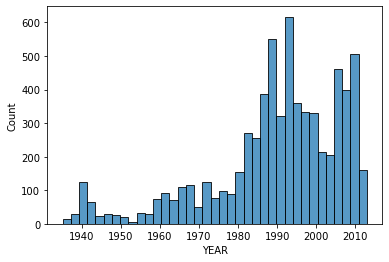

In [39]:
sns.histplot(df['YEAR'])